Using a simple built in model for face recognition

In [1]:
import cv2
import os
import matplotlib.pyplot as plt

In [2]:
# Setting the path for the Cascade module:
cascade_path = cv2.data.haarcascades + "haarcascade_frontalface_default.xml"

# Making sure the file exists:
if not os.path.exists(cascade_path):
    raise FileNotFoundError(f"Haar cascade file not found at {cascade_path}")

# Initiating the face cascade classifier:
face_cascade = cv2.CascadeClassifier(cascade_path)


In [3]:
# Loading the sample image:
image_path = "C:\MSAAI\AAI-540\Team Project\Images\sample_img.png"
image = cv2.imread(image_path)
if image is None:
    raise FileNotFoundError(f"Image not found at {image_path}")

In [4]:
ext = os.path.splitext(image_path)[1].lower()
if ext not in ['.jpg', '.jpeg']:
    
    # Converting the image to JPG format:
    new_image_path = os.path.splitext(image_path)[0] + ".jpg"
    cv2.imwrite(new_image_path, image)
    print(f"Image was not in JPG format (found {ext}). Converted and saved as {new_image_path}.")
    
    # Updating the image_path if necessary:
    image_path = new_image_path
    image = cv2.imread(image_path)

Image was not in JPG format (found .png). Converted and saved as C:\MSAAI\AAI-540\Team Project\Images\sample_img.jpg.


In [5]:
# Converting the image to grayscale:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [6]:
# Detecting faces in the image:
faces = face_cascade.detectMultiScale(gray_image, scaleFactor=1.1, minNeighbors=5)

print(f"Detected {len(faces)} face(s) using Haar Cascade.")

Detected 5 face(s) using Haar Cascade.


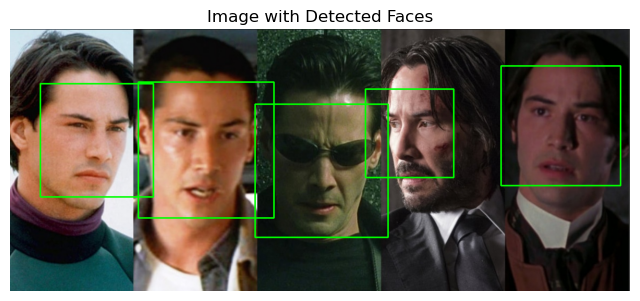

In [7]:
# Drawing bounding boxes on the original image:
for (x, y, w, h) in faces:
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Converting the image to RGB:
import matplotlib.pyplot as plt
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Displaying the image with bounding boxes around the face(s):
plt.figure(figsize=(8, 6))
plt.imshow(image_rgb)
plt.title("Image with Detected Faces")
plt.axis("off")
plt.show()


In [8]:
# Creating a list to store processed face images:
face_images = []

#  Processing each detected face
for idx, (x, y, w, h) in enumerate(faces):
    # Cropping the facial region(s) from the original image:
    face_roi = image[y:y+h, x:x+w]
    
    # Resizing the face(s) to 48x48 pixels:
    face_resized = cv2.resize(face_roi, (48, 48))
    
    # Converting the resized face(s) to grayscale (if not already):
    if len(face_resized.shape) == 3 and face_resized.shape[2] == 3:
        face_gray = cv2.cvtColor(face_resized, cv2.COLOR_BGR2GRAY)
    else:
        face_gray = face_resized

    # Saving the processed face(s) image with a unique filename:
    output_dir = "C:\MSAAI\AAI-540\Team Project\Images"
    output_filename = os.path.join(output_dir, f"face_{idx}.png")
    cv2.imwrite(output_filename, face_gray)
    print(f"Saved face {idx} as {output_filename}")

    # Appending the processed face(s) to the list:
    face_images.append(face_gray)


Saved face 0 as C:\MSAAI\AAI-540\Team Project\Images\face_0.png
Saved face 1 as C:\MSAAI\AAI-540\Team Project\Images\face_1.png
Saved face 2 as C:\MSAAI\AAI-540\Team Project\Images\face_2.png
Saved face 3 as C:\MSAAI\AAI-540\Team Project\Images\face_3.png
Saved face 4 as C:\MSAAI\AAI-540\Team Project\Images\face_4.png


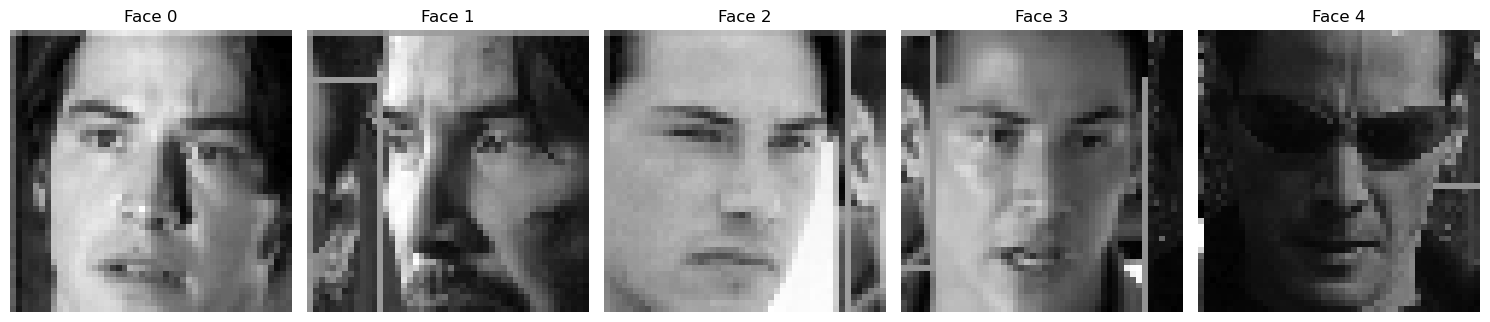

In [9]:
# Displaying all cropped face images in one figure:
num_faces = len(face_images)
plt.figure(figsize=(15, 5))
for idx, face in enumerate(face_images):
    plt.subplot(1, num_faces, idx + 1)
    plt.imshow(face, cmap='gray')
    plt.title(f"Face {idx}")
    plt.axis("off")
plt.tight_layout()
plt.show()